# Libraries

In [1]:
# Correlation
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
from pandas.api.types import is_numeric_dtype, is_categorical_dtype, is_object_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Load data

In [2]:
df1 = pd.read_pickle(r".\df_dummies\df1_dummies.pkl")
df2 = pd.read_pickle(r".\df_dummies\df2_dummies.pkl")
df3 = pd.read_pickle(r".\df_dummies\df3_dummies.pkl")
df4 = pd.read_pickle(r".\df_dummies\df4_dummies.pkl")

# df Input

In [3]:
i = 2
dfi = df2

# Note
- The whole of features has also been checked. Only masking and adverse were correplated with their corresponding alternative fromarts, giving same information.

# Continues x Continues

In [4]:
cont_cols = [col for col in dfi.columns if '_Counts' in col or '_Log' in col]
dfi[cont_cols]

corr = dfi[cont_cols].corr(method="pearson")
corr


Completion_Gap_Log  Adverse_Counts_Log  \
Completion_Gap_Log                   1.000000            0.226787   
Adverse_Counts_Log                   0.226787            1.000000   
Adverse_System_Counts_Log            0.231063            0.924233   
Arm_Counts_Log                      -0.123776            0.169129   
City_Counts_Log                      0.148316            0.461839   
Enrollment_Counts_Log                0.138591            0.333691   

                           Adverse_System_Counts_Log  Arm_Counts_Log  \
Completion_Gap_Log                          0.231063       -0.123776   
Adverse_Counts_Log                          0.924233        0.169129   
Adverse_System_Counts_Log                   1.000000        0.102715   
Arm_Counts_Log                              0.102715        1.000000   
City_Counts_Log                             0.398430        0.239814   
Enrollment_Counts_Log                       0.190602        0.357904   

                           City_Counts_Log  Enrollment_Counts_Log  
Completion_Gap_Log                0.148316               0.138591  
Adverse_Counts_Log                0.461839               0.333691  
Adverse_System_Counts_Log         0.398430               0.190602  
Arm_Counts_Log                    0.239814               0.357904  
City_Counts_Log                   1.000000               0.408739  
Enrollment_Counts_Log             0.408739               1.000000

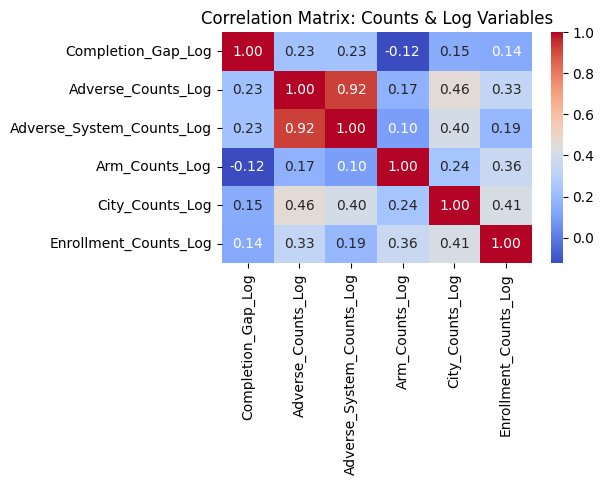

In [5]:
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title("Correlation Matrix: Counts & Log Variables")
plt.show()


# categ x Categ

In [6]:
categ_cols = [col for col in dfi.columns if 'Adverse' in col and '_List' in col]
dfi_cat = dfi[categ_cols]

def fun_cramers_v(x, y):  
     
    chi2 = chi2_contingency(pd.crosstab(x, y))[0]
    n = pd.crosstab(x, y).sum().sum()
    r, k = pd.crosstab(x, y).shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) if n > 0 else np.nan

n = len(categ_cols)
corr_categ = pd.DataFrame(np.zeros((n, n)), index = categ_cols, columns = categ_cols) 

for i in range(n):
    for j in range(i, n):
        if i == j:
            corr = 1.0
        else:
            corr = fun_cramers_v(dfi_cat.iloc[:, i], dfi_cat.iloc[:, j])  # runs function
        corr_categ.iloc[i, j] = corr
        corr_categ.iloc[j, i] = corr

corr_categ

Adverse_List_Adv_Death  \
Adverse_List_Adv_Death                                            1.000000   
Adverse_List_Adv_Serious                                          0.640168   
Adverse_List_Adv_Unspecified                                      0.593246   
Adverse_System_List_Adv_Syst_Blood, Lymphatic, ...                0.594098   
Adverse_System_List_Adv_Syst_Cardio                               0.563200   
Adverse_System_List_Adv_Syst_Ear                                  0.332154   
Adverse_System_List_Adv_Syst_Eye                                  0.415625   
Adverse_System_List_Adv_Syst_Gastrointestinal                     0.582306   
Adverse_System_List_Adv_Syst_General                              0.625448   
Adverse_System_List_Adv_Syst_Hepatobiliary                        0.432724   
Adverse_System_List_Adv_Syst_Immune System                        0.325252   
Adverse_System_List_Adv_Syst_Infections                           0.579401   
Adverse_System_List_Adv_Syst_Injury, Poisoning,...                0.486887   
Adverse_System_List_Adv_Syst_Metabolism/ Nutrition                0.580908   
Adverse_System_List_Adv_Syst_Musculoskeletal                      0.541932   
Adverse_System_List_Adv_Syst_Neoplasms                            0.458941   
Adverse_System_List_Adv_Syst_Nervous System                       0.565064   
Adverse_System_List_Adv_Syst_Product Issues, In...                0.559854   
Adverse_System_List_Adv_Syst_Psychiatric, Social                  0.504560   
Adverse_System_List_Adv_Syst_Renal, Urinary                       0.543241   
Adverse_System_List_Adv_Syst_Reproductive, Preg...                0.335667   
Adverse_System_List_Adv_Syst_Respiratory                          0.593489   
Adverse_System_List_Adv_Syst_Skin                                 0.518970   
Adverse_System_List_Adv_Syst_Surgical, Medical                    0.201275   
Adverse_System_List_Adv_Syst_Vascular                             0.579563   

                                                    Adverse_List_Adv_Serious  \
Adverse_List_Adv_Death                                              0.640168   
Adverse_List_Adv_Serious                                            1.000000   
Adverse_List_Adv_Unspecified                                        0.774167   
Adverse_System_List_Adv_Syst_Blood, Lymphatic, ...                  0.695378   
Adverse_System_List_Adv_Syst_Cardio                                 0.684805   
Adverse_System_List_Adv_Syst_Ear                                    0.429243   
Adverse_System_List_Adv_Syst_Eye                                    0.527061   
Adverse_System_List_Adv_Syst_Gastrointestinal                       0.774915   
Adverse_System_List_Adv_Syst_General                                0.733086   
Adverse_System_List_Adv_Syst_Hepatobiliary                          0.494571   
Adverse_System_List_Adv_Syst_Immune System                          0.416188   
Adverse_System_List_Adv_Syst_Infections                             0.793773   
Adverse_System_List_Adv_Syst_Injury, Poisoning,...                  0.657689   
Adverse_System_List_Adv_Syst_Metabolism/ Nutrition                  0.702247   
Adverse_System_List_Adv_Syst_Musculoskeletal                        0.711173   
Adverse_System_List_Adv_Syst_Neoplasms                              0.530700   
Adverse_System_List_Adv_Syst_Nervous System                         0.748053   
Adverse_System_List_Adv_Syst_Product Issues, In...                  0.693012   
Adverse_System_List_Adv_Syst_Psychiatric, Social                    0.643889   
Adverse_System_List_Adv_Syst_Renal, Urinary                         0.646880   
Adverse_System_List_Adv_Syst_Reproductive, Preg...                  0.452065   
Adverse_System_List_Adv_Syst_Respiratory                            0.753952   
Adverse_System_List_Adv_Syst_Skin                                   0.666859   
Adverse_System_List_Adv_Syst_Surgical, Medical                      0.272879   
Adverse_System_List_Adv

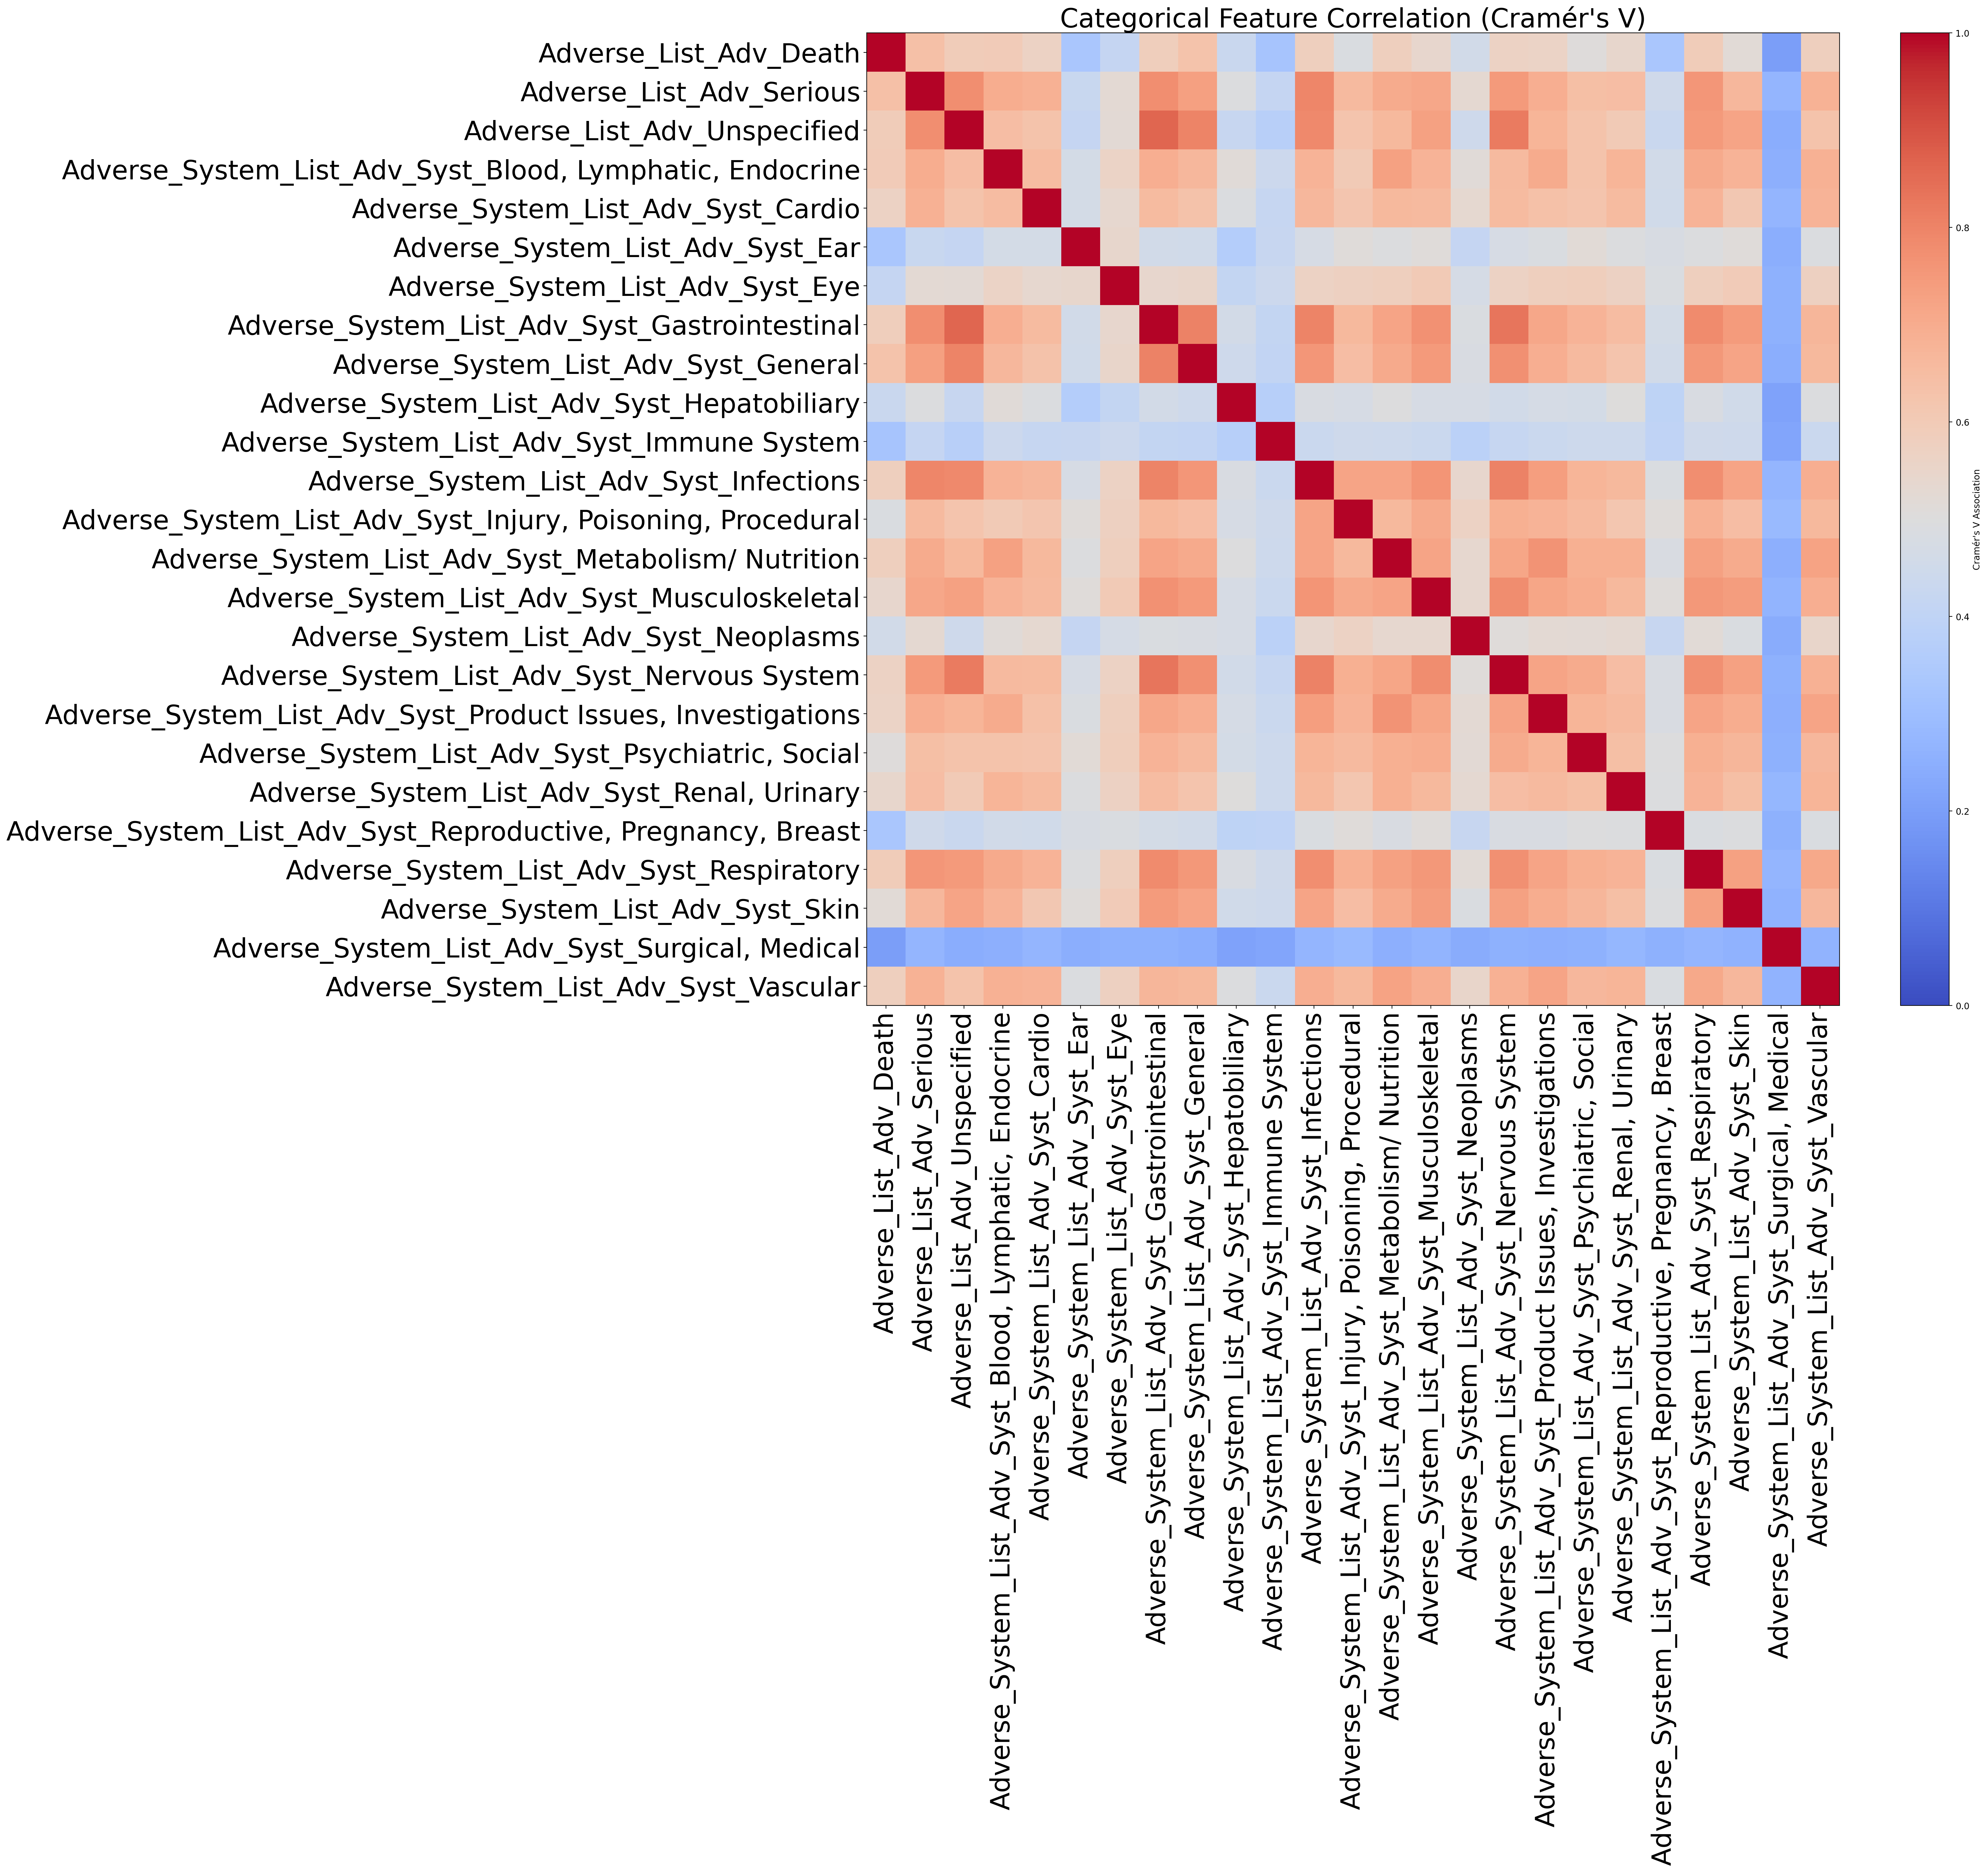

In [7]:
plt.figure(figsize=(25, 20), dpi = 200)
plt.imshow(corr_categ, cmap="coolwarm", vmin=0, vmax=1)
plt.colorbar(label="Cramér's V Association")
plt.xticks(range(len(corr_categ)), corr_categ.columns, fontsize=30, rotation=90)
plt.yticks(range(len(corr_categ)), corr_categ.index, fontsize=30)

plt.title("Categorical Feature Correlation (Cramér's V)", fontsize=30)
plt.show()

# Categ x Continues

In [8]:
def correlation_ratio(categories, values):

    categories = pd.Categorical(categories)
    cat_levels = categories.categories
    
    y_mean = np.mean(values)
    ss_between = 0
    ss_total = np.sum((values - y_mean) ** 2)
    
    for cat in cat_levels:
        vals = values[categories == cat]
        if len(vals) > 0:
            ss_between += len(vals) * (np.mean(vals) - y_mean) ** 2
    
    eta = np.sqrt(ss_between / ss_total) if ss_total != 0 else 0
    return eta


categ_cols = [col for col in dfi.columns if '_Categ' in col or '_Bin' in col or '_List' in col]
cont_cols = [col for col in dfi.columns if '_Log' in col or '_Counts' in col]

corr_matrix = pd.DataFrame(index=categ_cols, columns=cont_cols, dtype=float)

for cat in categ_cols:
    for cont in cont_cols:
        corr_matrix.loc[cat, cont] = correlation_ratio(dfi[cat], dfi[cont])

corr_matrix




Completion_Gap_Log  Adverse_Counts_Log  \
Study_Status_Bin                                0.093772            0.119045   
Funder_Industry_Bin                             0.177342            0.271233   
Placebo_Bin                                     0.163051            0.031403   
Standard_Care_Bin                               0.006068            0.022938   
Healthy_Bin                                     0.183082            0.074816   
...                                                  ...                 ...   
Primary_Purpose_List_SUPPORTIVE_CARE            0.019643            0.051027   
Primary_Purpose_List_TREATMENT                  0.104747            0.073970   
Continents_List_Asia                            0.011938            0.042217   
Continents_List_Europe                          0.092202            0.049377   
Continents_List_North America                   0.124090            0.423818   

                                      Adverse_System_Counts_Log  \
Study_Status_Bin                                       0.045244   
Funder_Industry_Bin                                    0.242387   
Placebo_Bin                                            0.021558   
Standard_Care_Bin                                      0.021566   
Healthy_Bin                                            0.117525   
...                                                         ...   
Primary_Purpose_List_SUPPORTIVE_CARE                   0.050491   
Primary_Purpose_List_TREATMENT                         0.111727   
Continents_List_Asia                                   0.080564   
Continents_List_Europe                                 0.012491   
Continents_List_North America                          0.461880   

                                      Arm_Counts_Log  City_Counts_Log  \
Study_Status_Bin                            0.085523         0.068766   
Funder_Industry_Bin                         0.293220         0.495397   
Placebo_Bin                                 0.344141         0.128449   
Standard_Care_Bin                           0.002050         0.035602   
Healthy_Bin                                 0.153089         0.161691   
...                                              ...              ...   
Primary_Purpose_List_SUPPORTIVE_CARE        0.010139         0.066641   
Primary_Purpose_List_TREATMENT              0.057869         0.148043   
Continents_List_Asia                        0.068556         0.126524   
Continents_List_Europe                      0.051128         0.365343   
Continents_List_North America               0.051814         0.299108   

                                      Enrollment_Counts_Log  
Study_Status_Bin                                   0.560817  
Funder_Industry_Bin                                0.214446  
Placebo_Bin                                        0.198940  
Standard_Care_Bin                                  0.024623  
Healthy_Bin                                        0.134945  
...                                                     ...  
Primary_Purpose_List_SUPPORTIVE_CARE               0.013108  
Primary_Purpose_List_TREATMENT                     0.097938  
Continents_List_Asia                               0.171748  
Continents_List_Europe                             0.153428  
Continents_List_North America                      0.012466  

[89 rows x 6 columns]

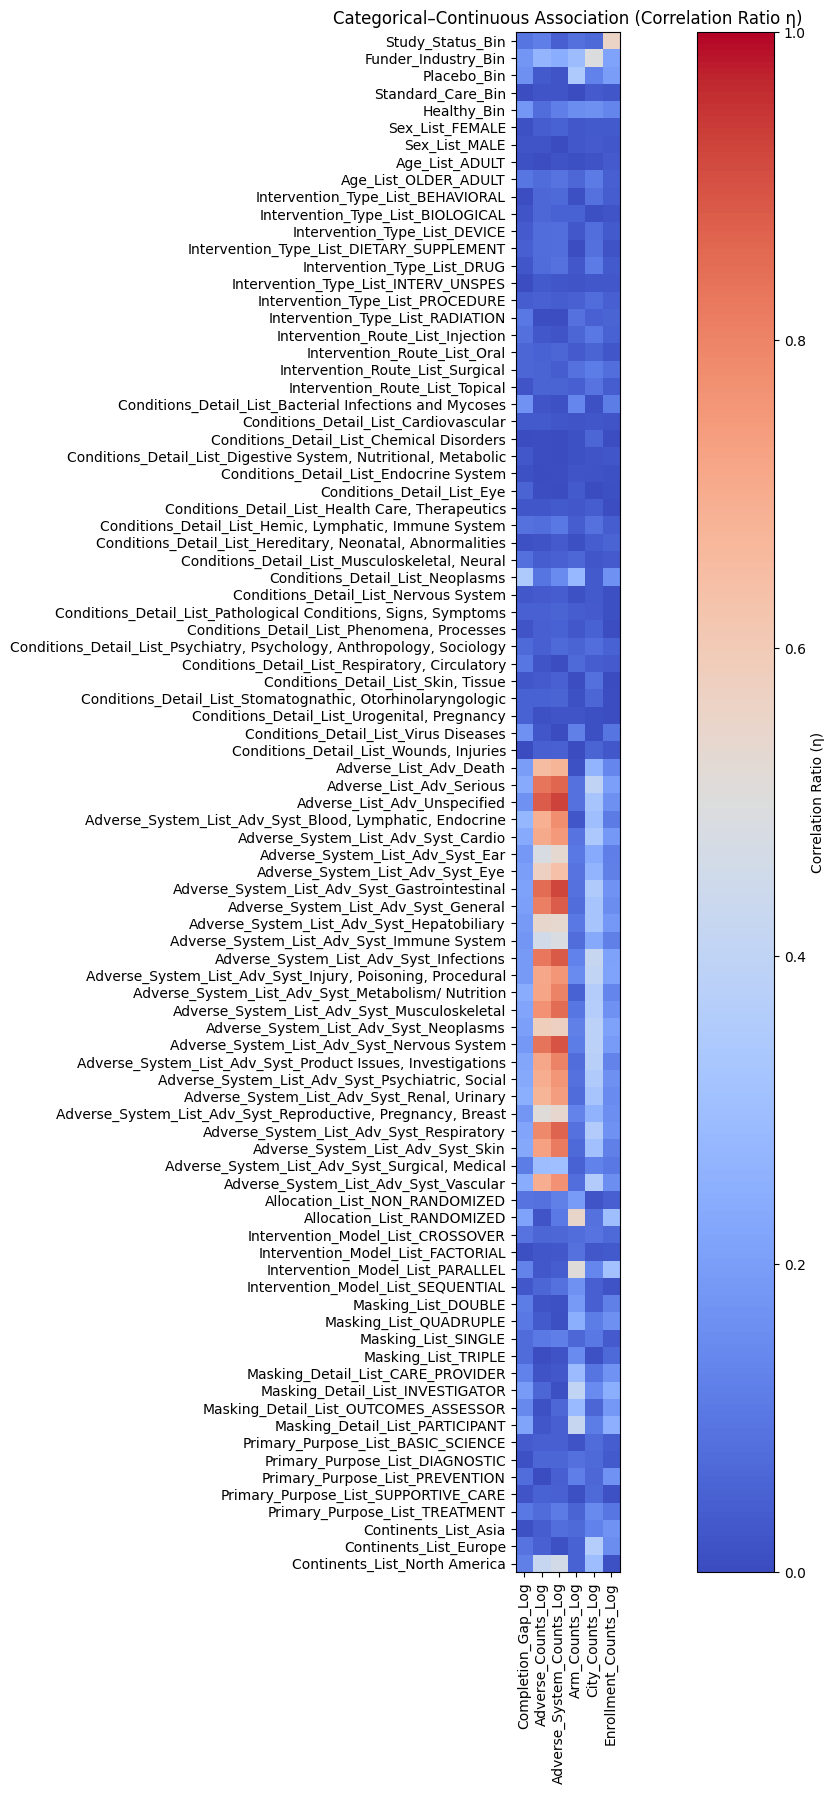

In [9]:
plt.figure(figsize=(20, 20))
plt.imshow(corr_matrix.astype(float), cmap="coolwarm", vmin=0, vmax=1)
plt.colorbar(label="Correlation Ratio (η)")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns , fontsize=10, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index, fontsize=10)
plt.title("Categorical–Continuous Association (Correlation Ratio η)", fontsize=12)
plt.show()

# Models

In [10]:
from sklearn.linear_model import LogisticRegression
import shap
import os

C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Eugenia\AppData\Local\Temp\ipykernel_72752\1090313453.py:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sam, plot_size = (10, 5), show = False)


Text(0.5, 1.0, 'Logistic  - SHAP Summary Plot')

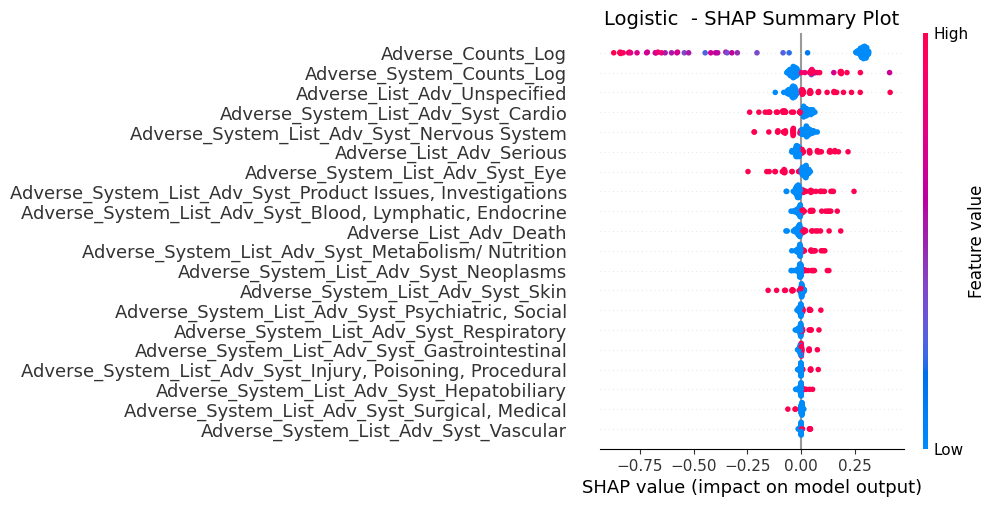

In [11]:
adv_cols = [col for col in dfi.columns if 'Adverse' in col]
X = dfi[adv_cols]
y = dfi['Study_Status_Bin']

log_reg = LogisticRegression(penalty = 'l1', max_iter = 5000 , solver = 'saga', class_weight = 'balanced',  random_state = 42)  
log_model = log_reg.fit(X, y)

X_sam = shap.sample(X, 100)
explainer = shap.Explainer(log_model.predict, X_sam)
shap_values = explainer(X_sam)

# Summary Plot --> overall 
shap.summary_plot(shap_values, X_sam, plot_size = (10, 5), show = False)
plt.title(f"Logistic  - SHAP Summary Plot", fontsize = 14)

In [12]:
mask_cols = [col for col in dfi.columns if 'Masking' in col]
X = dfi[mask_cols]
y = dfi['Study_Status_Bin']
X.columns.to_list()

['Masking_List_DOUBLE',
 'Masking_List_QUADRUPLE',
 'Masking_List_SINGLE',
 'Masking_List_TRIPLE',
 'Masking_Detail_List_CARE_PROVIDER',
 'Masking_Detail_List_INVESTIGATOR',
 'Masking_Detail_List_OUTCOMES_ASSESSOR',
 'Masking_Detail_List_PARTICIPANT']

C:\Users\Eugenia\AppData\Local\Temp\ipykernel_72752\1018847771.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sam, plot_size = (10, 5), show = False)


Text(0.5, 1.0, 'Logistic  - SHAP Summary Plot')

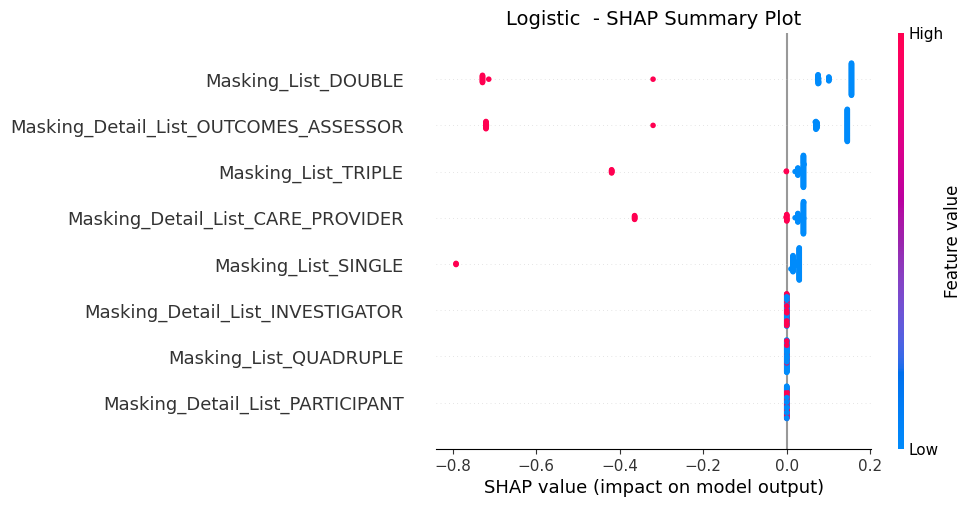

In [13]:
log_reg = LogisticRegression(penalty = 'l1', max_iter = 5000 , solver = 'saga', class_weight = 'balanced',  random_state = 42)  
log_model = log_reg.fit(X, y)

X_sam = shap.sample(X, 100)
explainer = shap.Explainer(log_model.predict, X_sam)
shap_values = explainer(X_sam)

# Summary Plot --> overall 
shap.summary_plot(shap_values, X_sam, plot_size = (10, 5), show = False)
plt.title(f"Logistic  - SHAP Summary Plot", fontsize = 14)

# Compare

## Adverse

In [14]:
def fun_aic(X, y):
    # Model 
    X = sm.add_constant(X)
    model = sm.Logit(y, X)
    results = model.fit(method = 'lbfgs', maxiter = 500)
    print(results.summary())

    # AIC
    aic = round(results.aic, 0)  # AIC test in case needed for comparison
    return aic

adv_cols = [col for col in dfi.columns if 'Adverse_Counts_Log' in col]
X = dfi[adv_cols]
aic_adv_log = fun_aic(X, y)
display(aic_adv_log)

adv_cols = [col for col in dfi.columns if 'Adverse_System_Counts_Log' in col]
X = dfi[adv_cols]
aic_adv_syst_log = fun_aic(X, y)
display(aic_adv_syst_log)

adv_cols = [col for col in dfi.columns if 'Adverse_List' in col]
X = dfi[adv_cols]
aic_adv_list = fun_aic(X, y)
display(aic_adv_list)

adv_cols = [col for col in dfi.columns if 'Adverse_Counts' in col or 'Adverse_System_Counts' in col]
X = dfi[adv_cols]
aic_adv_counts = fun_aic(X, y)
display(aic_adv_counts)

adv_cols = [col for col in dfi.columns if 'Adverse_System' in col and 'Adverse_System_Counts' not in col]
X = dfi[adv_cols]
aic_adv_syst = fun_aic(X, y)
display(aic_adv_syst)

adv_cols = [col for col in dfi.columns if 'Adverse' in col]
X = dfi[adv_cols]
aic_adv_all = fun_aic(X, y)
display(aic_adv_all)

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29258
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01306
Time:                        08:57:26   Log-Likelihood:                -16496.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 6.260e-97
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8562      0.016    -53.278      0.000      -0.888      -0.825
Adverse_Counts_Log    -0.1532      0.008    -20.165      0.000      -0.168      -0.138


32996.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29258
Method:                           MLE   Df Model:                            1
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                0.001813
Time:                        08:57:26   Log-Likelihood:                -16684.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 6.964e-15
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9742      0.017    -58.155      0.000      -1.007      -0.941
Adverse_System_Counts_Log    -0.0867      0.011     -7.731      0.000      -0.109     

33372.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29256
Method:                           MLE   Df Model:                            3
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                0.002539
Time:                        08:57:27   Log-Likelihood:                -16672.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 2.741e-18
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9741      0.017    -57.265      0.000      -1.007      -0.941
Adverse_List_Adv_Death           0.1972      0.043      4.604      0.000     

33352.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29257
Method:                           MLE   Df Model:                            2
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.04410
Time:                        08:57:27   Log-Likelihood:                -15977.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9682      0.017    -57.632      0.000      -1.001      -0.935
Adverse_Counts_Log           -0.8079      0.024    -33.837      0.000      -0.855     

31961.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29237
Method:                           MLE   Df Model:                           22
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01283
Time:                        08:57:27   Log-Likelihood:                -16500.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 4.247e-77
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.9688      0.017    -58.610      0.000      

33046.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29232
Method:                           MLE   Df Model:                           27
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.05407
Time:                        08:57:27   Log-Likelihood:                -15811.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -0.9726      0.017    -56.661      0.000      

31677.0

In [15]:
mask_cols = [col for col in dfi.columns if 'Masking_Detail' in col]
X = dfi[mask_cols]
aic_mask_det = fun_aic(X, y)
display(aic_mask_det)

mask_cols = [col for col in dfi.columns if 'Masking' in col and 'Masking_Detail' not in col]
X = dfi[mask_cols]
aic_mask = fun_aic(X, y)
display(aic_mask)

mask_cols = [col for col in dfi.columns if 'Masking' in col]
X = dfi[mask_cols]
aic_mask_all = fun_aic(X, y)
display(aic_mask_all)

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29255
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01074
Time:                        08:57:27   Log-Likelihood:                -16535.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 1.836e-76
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8449      0.017    -49.136      0.000      -0.879      -0.811
Masking_Detail_List_CARE_PROVIDER         0.2026  

33080.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29255
Method:                           MLE   Df Model:                            4
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01327
Time:                        08:57:27   Log-Likelihood:                -16493.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 1.126e-94
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8099      0.017    -46.301      0.000      -0.844      -0.776
Masking_List_DOUBLE       -0.6235      0.045    -13.941      0.000      -0.711      -0.536
Mask

32996.0

                           Logit Regression Results                           
Dep. Variable:       Study_Status_Bin   No. Observations:                29260
Model:                          Logit   Df Residuals:                    29251
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Sep 2025   Pseudo R-squ.:                 0.01379
Time:                        08:57:27   Log-Likelihood:                -16484.
converged:                       True   LL-Null:                       -16714.
Covariance Type:            nonrobust   LLR p-value:                 1.579e-94
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8098        nan        nan        nan         nan         nan
Masking_List_DOUBLE                      -0.4465  

C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


32986.0